# Introdução à Visão Computacional
Prof. Ricardo Petri Silva

In [ ]:
import cv2
from PIL import Image
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import imFerramentas as imF

## Segmentação baseada em agrupamento (K-means)



In [ ]:
imagem_original = cv2.imread("nemo.png")

#Conversão para RGB
imagem = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
imagem.shape

(667, 995, 3)

In [ ]:
#Modificando a representação da imagem para um array bidimensional, contendo os pixels e os 3 canais de cores RGB
imagem = imagem.reshape((-1, 3))
imagem.shape

(663665, 3)

In [ ]:
#Convertendo os pixels para o tipo float para podermos executar o algoritmo k-means
imagem = np.float32(imagem)
imagem

array([[202., 202., 202.],
       [202., 202., 202.],
       [223., 223., 223.],
       ...,
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [202., 202., 202.]], dtype=float32)

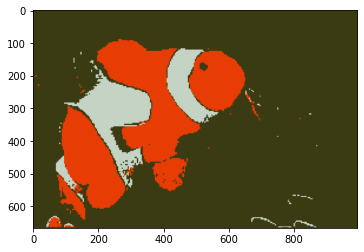

In [ ]:
#Definindo um critério de parada
criterio_parada = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
#cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter

#Definindo o número de clusters (k)
k = 3
_, labels, centers = cv2.kmeans(imagem, k, None, criterio_parada, 10, cv2.KMEANS_RANDOM_CENTERS)
# _ -> compactness : It is the sum of squared distance from each point to their corresponding centers.
# labels : This is the label array where each element marked '0', '1'.....
# centers : This is array of centers of clusters.

# Conversão dos pixels para a mesma formatação original (8 bit values)
centers = np.uint8(centers)

#Conversão do array para unidimensional
labels = labels.flatten()

#Converte toda coloração dos pixels de acordo com a cor dos centróides
imagem_segmentada = centers[labels.flatten()]

#Modifica a forma (shape) da imagem clusterizada para sua forma original
imagem_segmentada = imagem_segmentada.reshape(imagem_original.shape)

#Exibe resultado
plt.imshow(imagem_segmentada)
plt.show()


## Segmentação baseada em cores


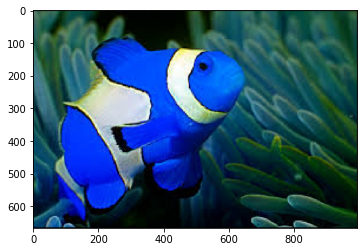

In [ ]:
imagem = cv2.imread('nemo.png')
plt.imshow(imagem)
plt.show()

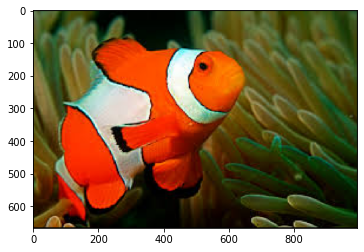

In [ ]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [ ]:
hsv_imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)

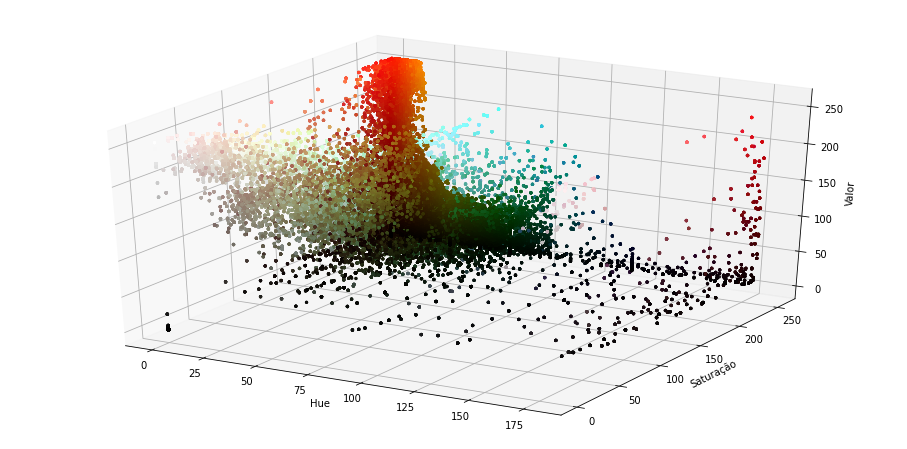

In [ ]:
h, s, v = cv2.split(hsv_imagem)
fig = plt.figure(figsize=(16,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

#normalização dos valores de cores dos pixels no canal hsv para podermos identificar as cores para serem segmentadas
cor_pixels = imagem.reshape((np.shape(imagem)[0]*np.shape(imagem)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(cor_pixels)
cor_pixels = norm(cor_pixels).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cor_pixels, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturação")
axis.set_zlabel("Valor")
plt.show()

In [ ]:
#Identificando as variações de cor laranja do peixe
laranja_claro = (0, 190, 200)
laranja_escuro = (22, 255, 255)

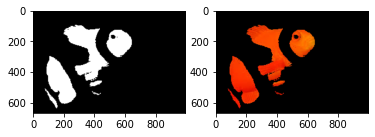

In [ ]:
mascara = cv2.inRange(hsv_imagem, laranja_claro, laranja_escuro)#Obtém todos os pixels com variação de coloração em um intervalo específico
resultado = cv2.bitwise_and(imagem, imagem, mask=mascara) #Agrupa apenas o que tiver em comum entre a imagem original e a máscara

plt.subplot(1, 2, 1)
plt.imshow(mascara, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(resultado)
plt.show()

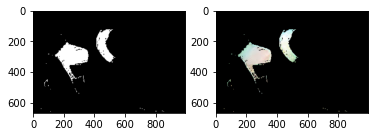

In [ ]:
#identificando as variações de cor branca do peixe
branco_claro = (0, 0, 188)
branco_escuro = (145, 80, 255)

mascara_branco = cv2.inRange(hsv_imagem, branco_claro, branco_escuro)
resultado_branco = cv2.bitwise_and(imagem, imagem, mask=mascara_branco)

plt.subplot(1, 2, 1)
plt.imshow(mascara_branco, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(resultado_branco)
plt.show()

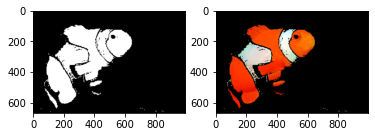

In [ ]:
mascara_final = mascara + mascara_branco #Junçãp das duas máscaras

resultado_final = cv2.bitwise_and(imagem, imagem, mask=mascara_final)
plt.subplot(1, 2, 1)
plt.imshow(mascara_final, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(resultado_final)
plt.show()

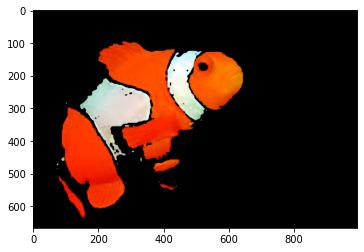

In [ ]:
filtro_mediana = cv2.medianBlur(resultado_final, 7)
plt.imshow(filtro_mediana)
plt.show()

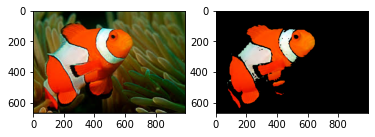

In [ ]:

plt.subplot(1, 2, 1)
plt.imshow(imagem)
plt.subplot(1, 2, 2)
plt.imshow(filtro_mediana)
plt.show()

## Forma alternativa de Segmentação baseada em cores

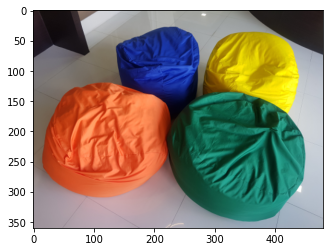

In [ ]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

imagem = imread('bags.png')
plt.imshow(imagem)
plt.show()

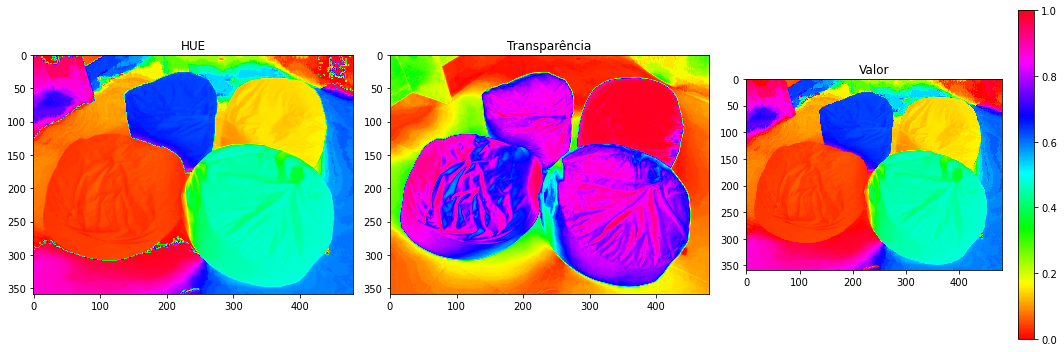

In [ ]:
imagem_hsv = rgb2hsv(imagem)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(imagem_hsv[:,:,0],cmap='hsv')
ax[0].set_title('HUE')
ax[1].imshow(imagem_hsv[:,:,1],cmap='hsv')
ax[1].set_title('Transparência')
ax[2].imshow(imagem_hsv[:,:,2],cmap='hsv')
ax[2].set_title('Valor')
fig.colorbar(imshow(imagem_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()

### Definindo limiares baseados na intensidade dos pixels (coloração)
- Identificando a cor azul

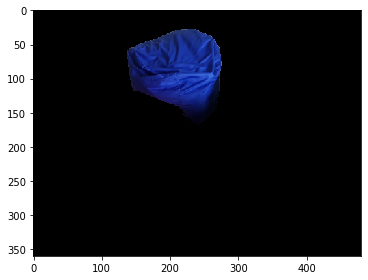

In [ ]:
#Baseado no valor do canal HUE 
mascara_inicial = imagem_hsv[:,:,0] > 0.6 
#Baseado no valor do canal HUE
mascara_final = imagem_hsv[:,:,0] < 0.7 
#Baseada no valor do canal de Transparência
mascara_saturacao = imagem_hsv[:,:,1] > 0.3 
 
mascara = mascara_inicial*mascara_final*mascara_saturacao
red = imagem[:,:,0]*mascara
green = imagem[:,:,1]*mascara
blue = imagem[:,:,2]*mascara
mascara = np.dstack((red,green,blue)) #Realiza a junção dos 3 canais
imshow(mascara)

- Identificando a cor amarela

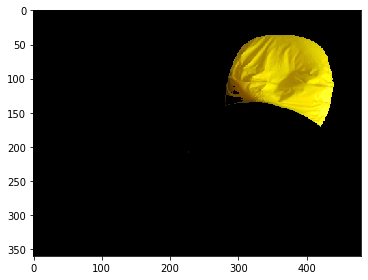

In [ ]:
#Baseado no valor do canal HUE 
mascara_inicial = imagem_hsv[:,:,0] > 0.1
#Baseado no valor do canal HUE
mascara_final = imagem_hsv[:,:,0] < 0.2
#Baseada no valor do canal de Transparência
mascara_saturacao = imagem_hsv[:,:,1] > 0.6 
 
mascara = mascara_inicial*mascara_final*mascara_saturacao
red = imagem[:,:,0]*mascara
green = imagem[:,:,1]*mascara
blue = imagem[:,:,2]*mascara
mascara = np.dstack((red,green,blue)) #Realiza a junção dos 3 canais
imshow(mascara)

- Identificando a cor laranja


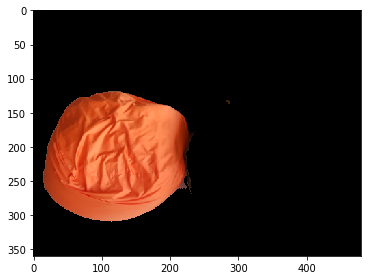

In [ ]:
#Baseado no valor do canal HUE 
mascara_inicial = imagem_hsv[:,:,0] > 0.0
#Baseado no valor do canal HUE
mascara_final = imagem_hsv[:,:,0] < 0.09
#Baseada no valor do canal de Transparência
mascara_saturacao = imagem_hsv[:,:,1] > 0.4 
 
mascara = mascara_inicial*mascara_final*mascara_saturacao
red = imagem[:,:,0]*mascara
green = imagem[:,:,1]*mascara
blue = imagem[:,:,2]*mascara
mascara = np.dstack((red,green,blue)) #Realiza a junção dos 3 canais
imshow(mascara)

- Identificando a cor verde

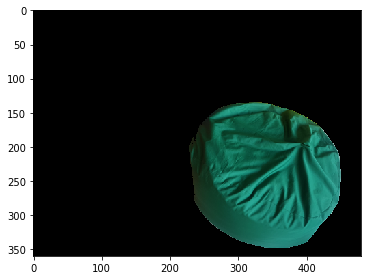

In [ ]:
#Baseado no valor do canal HUE 
mascara_inicial = imagem_hsv[:,:,0] > 0.2
#Baseado no valor do canal HUE
mascara_final = imagem_hsv[:,:,0] < 0.5
#Baseada no valor do canal de Transparência
mascara_saturacao = imagem_hsv[:,:,1] > 0.1

mascara = mascara_inicial*mascara_final*mascara_saturacao
red = imagem[:,:,0]*mascara
green = imagem[:,:,1]*mascara
blue = imagem[:,:,2]*mascara
mascara = np.dstack((red,green,blue)) #Realiza a junção dos 3 canais
imshow(mascara)

### Segmentação para identificação de reflexos luminosos em imagens

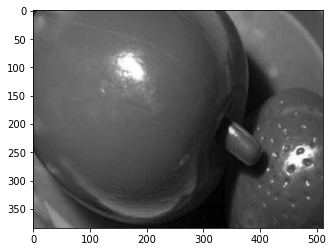

In [ ]:
imagem =  cv2.imread('reflexo2.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem, cmap='gray')

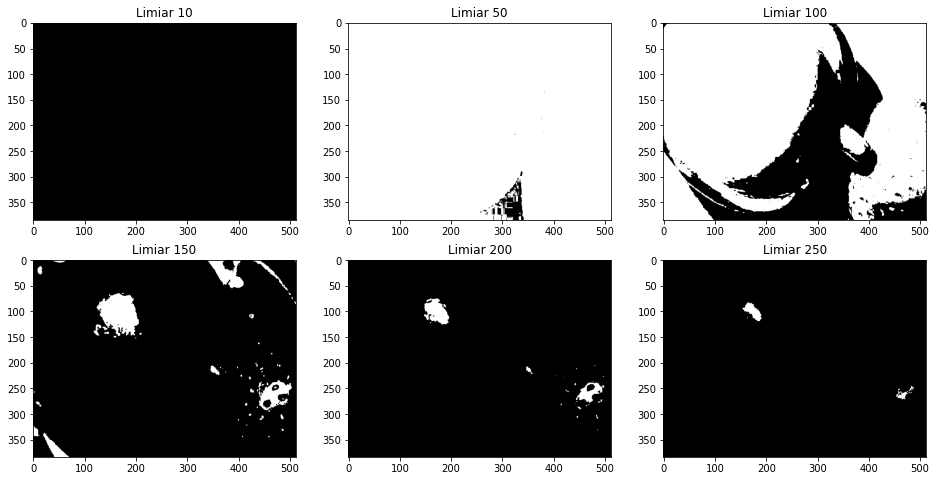

In [ ]:
#Tentando identificar apenas os reflexos luminosos por meio da variação do limiar
fig = plt.figure(figsize=(16, 8))
aux = 1
for lim in [10,50,100,150,200,250]:
  sub_imagem = fig.add_subplot(2, 3, aux)
  imgplot = plt.imshow(imF.limiarizacao(imagem,lim),cmap="gray")
  sub_imagem.set_title('Limiar '+str(lim))
  aux = aux + 1